<a href="https://colab.research.google.com/github/anajikadam17/MachineLearning_2022/blob/main/DecisionTree/DecisionTree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classification

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [4]:
print(X_train.shape, y_test.shape)

(120, 4) (30,)


In [5]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
y_pred = clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.9333333333333333


### Ads dataset

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/anajikadam/MyRowData/main/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
df['Gender'].replace({'Male':0, 'Female':1}, inplace = True)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [14]:
X = df.iloc[:, 1:4].values
y = df.iloc[:, 4].values

print(X.shape)
print(y.shape)

(400, 3)
(400,)


In [16]:
clf1 = DecisionTreeClassifier().fit(X, y )


## Overfitting and Underfitting in Decision Tree

In [17]:
def analyzer(max_depth):
  data = pd.read_csv("https://raw.githubusercontent.com/anajikadam/MyRowData/main/Social_Network_Ads.csv")
  X = data.iloc[:,2:4].values # Age	EstimatedSalary	
  y = data.iloc[:,-1].values # Purchased

  clf = DecisionTreeClassifier(max_depth = max_depth)
  clf.fit(X, y)

  a = np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.1)
  b = np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=100)

  XX, YY = np.meshgrid(a,b)

  input_array = np.array([XX.ravel(), YY.ravel()]).T

  labels = clf.predict(input_array)

  plt.contourf(XX, YY, labels.reshape(XX.shape), alpha=0.5)
  plt.scatter(X[:,0], X[:,1], c=y)
  

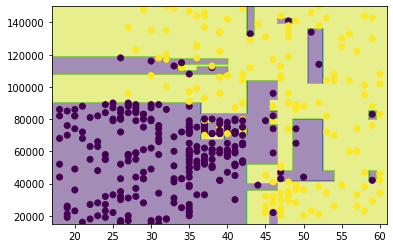

In [18]:
# Overfitting max_depth=None
analyzer(max_depth=None)

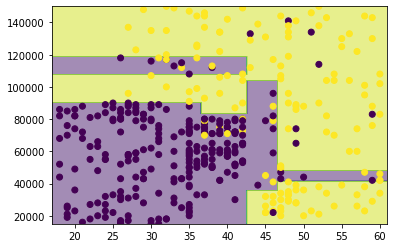

In [19]:
analyzer(max_depth=4)

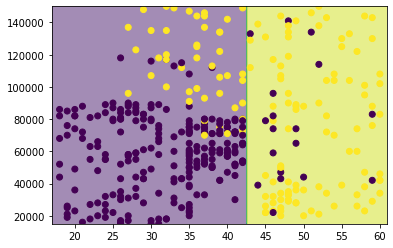

In [20]:
# Underfitting max_depth = 1 (lower value)
analyzer(max_depth=1)

### Hyper-parameter Tuning using GridSearchCV

In [33]:
df = pd.read_csv("https://raw.githubusercontent.com/anajikadam/MyRowData/main/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [34]:
df['Gender'].replace({'Male':0, 'Female':1}, inplace = True)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [35]:
X = df.iloc[:, 1:4].values
y = df.iloc[:, -1].values

print(X.shape)
print(y.shape)

(400, 3)
(400,)


In [36]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)


In [37]:
X

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606,  1.17910958, -1.46068138],
       [-1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606,  1.08359645, -0.99084367]])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
y_pred = dt.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.775

In [43]:
param_dict = {
    "criterion":["gini", "entropy"],
    "max_depth":[1,2,3,4,5,6,7,None]

}

In [44]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(dt, param_grid = param_dict, cv = 10, n_jobs = -1)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [45]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=2)

In [47]:
# criterion gini is default paramater
grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [48]:
grid.best_score_

0.91875

## Apply Decision Tree and GridSearchCV on Pima-Indian-Diabetes.data.csv Dataset

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/anajikadam/MyRowData/main/pima-indians-diabetes.data.csv")
df.head()


,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [22]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(X.shape)
print(y.shape)

(767, 8)
(767,)


In [23]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [24]:
X.shape

(767, 8)

In [25]:
X

array([[-0.84372629, -1.12208597, -0.16024856, ..., -0.68372895,
        -0.36426474, -0.18894038],
       [ 1.23423997,  1.94447577, -0.26357823, ..., -1.10230105,
         0.60470064, -0.1037951 ],
       [-0.84372629, -0.99692019, -0.16024856, ..., -0.49346891,
        -0.91968415, -1.0403932 ],
       ...,
       [ 0.343683  ,  0.0044061 ,  0.14974046, ..., -0.73446496,
        -0.68423462, -0.27408566],
       [-0.84372629,  0.16086333, -0.47023757, ..., -0.23978884,
        -0.37030191,  1.17338414],
       [-0.84372629, -0.8717544 ,  0.04641078, ..., -0.20173684,
        -0.47293375, -0.87010264]])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred = dt.predict(X_test)
accuracy_score(y_pred, y_test)

0.7337662337662337

In [29]:
param_dict = {
    "criterion":["gini", "entropy"],
    "max_depth":[1,2,3,4,5,6,7,None],
    "max_leaf_nodes":[10,20,25,30,None]
}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(dt, param_grid = param_dict, cv = 10, n_jobs = -1)

grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'max_leaf_nodes': [10, 20, 25, 30, None]})

In [30]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=20)

In [31]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 20}

In [32]:
grid.best_score_

0.7504230565838181